In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/datas/data.csv")
labels = pd.read_csv("/content/drive/MyDrive/datas/labels.csv")

#1. Clustering using k-means

In [ ]:
data.head(2)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.0,9.796088,0.0,0.0,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,...,9.370304,10.362393,5.589928,8.141964,0.0,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.0,10.070470,0.0,0.0,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,...,8.882967,9.898199,7.069401,7.186134,0.0,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0


In [ ]:
# It is better to scaling our data before clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_values = scaler.fit_transform(data.iloc[:,1:])
data.iloc[:,1:] = scaled_values

In [ ]:
data.rename(columns={"Unnamed: 0": 'Sample'}, inplace = True)
data.head(2)

,Sample,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,-1.0,-0.353151,0.077112,-0.816727,0.367300,-1.0,-0.043991,-0.574042,-1.0,-1.0,-0.903706,-0.661540,-0.157386,-0.786634,-1.0,-1.0,-1.0,-1.0,-0.891016,-0.947970,-0.627535,-1.0,0.253396,-1.0,-1.0,-0.418477,0.087858,0.738102,0.291569,0.341072,-1.0,-0.146336,0.099308,-0.286693,0.085724,0.535363,-1.000000,-1.0,0.439575,...,-0.561690,-0.002695,0.071062,0.235479,-1.0,-0.669606,-0.000399,0.061745,0.436429,0.306367,-0.264489,-0.249897,-0.516708,-0.347582,-0.712705,0.146130,-0.365999,-0.045470,-1.000000,0.159675,-1.0,-0.112486,-0.572265,0.365151,-0.395424,0.601585,0.547159,-0.338398,-0.555837,-0.197692,-0.156816,-0.307943,-0.204119,0.568294,-0.403199,0.266729,0.023083,-0.572908,-0.115559,-1.0
1,sample_1,-1.0,-0.809931,-0.476070,0.006543,-0.186873,-1.0,-0.149812,-1.000000,-1.0,-1.0,-1.000000,-0.850885,0.031261,-0.637921,-1.0,-1.0,-1.0,-1.0,-1.000000,0.599335,-0.005493,-1.0,0.314743,-1.0,-1.0,-1.000000,0.500181,-0.130022,-0.770804,-0.500404,-1.0,-1.000000,-0.506992,-0.800601,-0.021480,-0.336036,-0.898781,-1.0,0.276048,...,-0.731693,-0.318688,0.598063,-0.174989,-1.0,-0.556391,-0.139784,-0.112632,0.124203,-0.777714,0.244649,0.076274,-0.346295,-0.796622,-0.478881,-0.076967,-1.000000,-0.576484,-0.719616,0.149851,-1.0,0.226549,-0.246152,0.158082,0.181283,0.019931,0.545831,0.334203,0.089074,0.683279,-0.292388,-0.708386,-0.190969,0.359020,-0.788010,0.554267,0.441037,-0.380324,-0.717261,-1.0


In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 1, init = 'k-means++')
kmeans.fit(data.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

#2. Reduce dimensions of data.csv

##sklearn PCA 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
data_reduced_pca = pca.fit_transform(scaled_values)

What is the ratio of variance explained by the two
components?


In [ ]:
exp_var_pca = pca.explained_variance_ratio_
exp_var_pca

array([0.12693977, 0.09402273])

In [ ]:
cum_sum_eigenvalues_pca = np.cumsum(exp_var_pca)
cum_sum_eigenvalues_pca

array([0.12693977, 0.22096251])

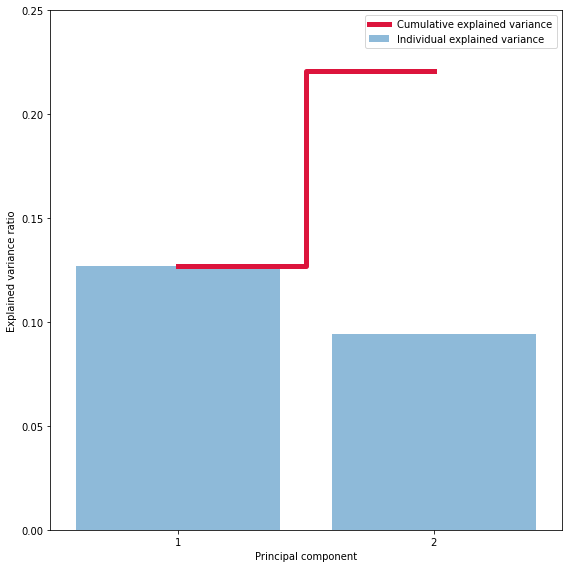

In [ ]:
plt.figure(figsize=(8, 8))
plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues_pca)+1), cum_sum_eigenvalues_pca, where='mid',label='Cumulative explained variance', color = 'crimson',  linewidth=5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.xlim(0.5,2.5)
plt.ylim(0,0.25)
plt.xticks(ticks = range(1,len(exp_var_pca)+1), labels = [1,2])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

##sklearn tSNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)

In [ ]:
data_reduced_tsne = tsne.fit_transform(scaled_values)

#3. Visualize k-means predictions

##Get cluster number predictions

In [ ]:
predicted_labels = kmeans.predict(data.iloc[:,1:])
predicted_labels.min(), predicted_labels.max()

(0, 4)

##Plot the results of PCA


In [ ]:
pcadf = pd.DataFrame(data_reduced_pca, columns=["component_1", "component_2"])

In [ ]:
pcadf['predicted_label'] = predicted_labels
pcadf['true_label'] = labels['Class']
pcadf.head(2)

,component_1,component_2,predicted_label,true_label
0,-11.336281,-17.744278,1,PRAD
1,-2.940408,20.560363,3,LUAD


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


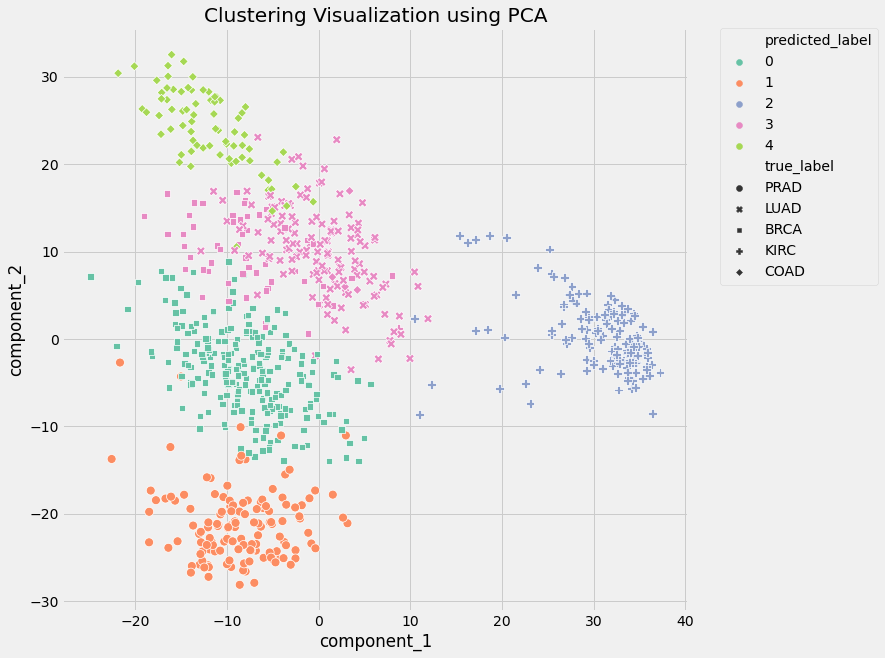

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 10))

scat = sns.scatterplot(
      "component_1",
      "component_2",
      s=80,
      data=pcadf,
      hue="predicted_label",
      style="true_label",
      palette="Set2",
  )

scat.set_title("Clustering Visualization using PCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

##Plot the results of tSNE

In [ ]:
tsnedf = pd.DataFrame(data_reduced_tsne, columns=["component_1", "component_2"])

In [ ]:
tsnedf['predicted_label'] = predicted_labels
tsnedf['true_label'] = labels['Class']
tsnedf.head(2)

,component_1,component_2,predicted_label,true_label
0,-10.975169,24.225313,1,PRAD
1,27.939049,-1.709156,3,LUAD


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


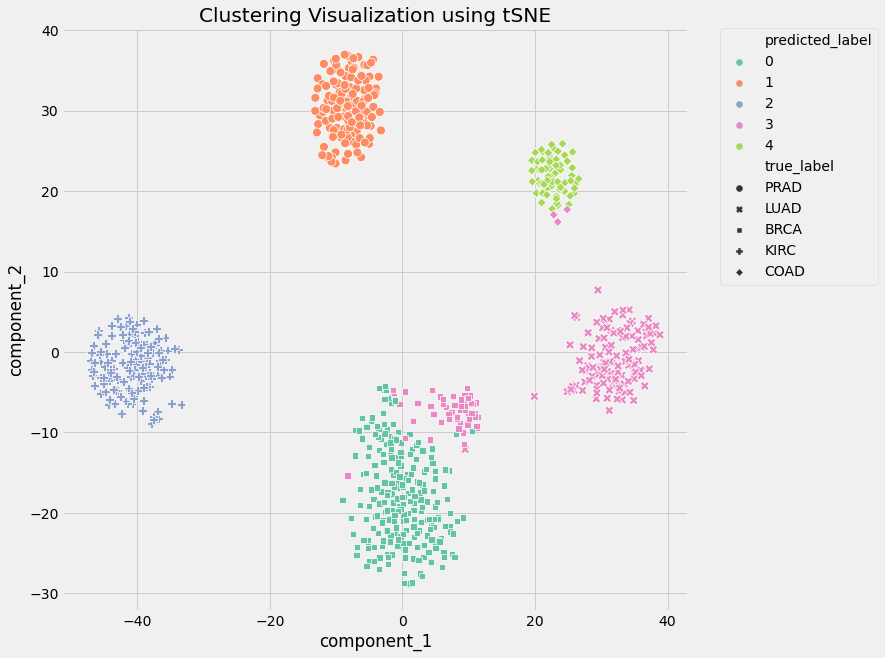

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 10))

scat = sns.scatterplot(
      "component_1",
      "component_2",
      s=80,
      data=tsnedf,
      hue="predicted_label",
      style="true_label",
      palette="Set2",
  )

scat.set_title("Clustering Visualization using tSNE")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

##What do you observe?
> tSNE demonstrates clusters seperately and distinctively, which make the graph more readible. 
> On the other hand, clusters are a bit nested in PCA, so cluster 
seperations are less distinguishable than tSNE.

##3D Visualization

In [ ]:
import plotly.express as px

In [ ]:
pca_3 =  PCA(n_components=3).fit_transform(scaled_values)
pca_3[0]

array([-11.33628125, -17.7442776 ,  31.70657943])

In [ ]:
df = pd.DataFrame(pca_3, columns=["component_1", "component_2", "component_3"])

In [ ]:
fig = px.scatter_3d(df, x='component_1', y='component_2', z='component_3',
                    color=predicted_labels, symbol=labels['Class'],opacity=0.8)
fig.show()